# Introduction

In this part of the analysis, we focused on reassigning individuals into the identified clusters using illustrative variables. Building on the clustering results from the first step, we evaluated two algorithms, Random Forest and Gradient Boosting.
Here, we focus on the segmentation of the orange variables.
In the first part, using the green variables and then using a specific set of variables.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.model_selection import GridSearchCV

## Data Loading ##

In [44]:
file_path = "fic_epita_kantar_codes.csv"
data = pd.read_csv(file_path, sep=';')

# Define Orange and Green variable groups
orange_vars = [
    "A9_1_slice", "A9_2_slice", "A9_3_slice", "A9_4_slice", "A9_5_slice",
    "A9_6_slice", "A9_7_slice", "A9_8_slice", "A9_9_slice", "A9_10_slice",
    "A9_11_slice", "A9_12_slice", "A9_13_slice", "A9_14_slice", "A9_15_slice",
    "A9_16_slice", "A10_1_slice", "A10_2_slice", "A10_3_slice", "A10_4_slice",
    "A10_5_slice", "A10_6_slice", "A10_7_slice", "A10_8_slice",
    "A11_1_slice", "A11_2_slice", "A11_3_slice", "A11_4_slice", "A11_5_slice",
    "A11_6_slice", "A11_7_slice", "A11_8_slice", "A11_9_slice", "A11_10_slice",
    "A11_11_slice", "A11_12_slice", "A11_13_slice"
]
green_vars = [
    "A11_1_slice", "A12", "A13", "A14", "A4", "A5", "A5bis", "A8_1_slice",
    "A8_2_slice", "A8_3_slice", "A8_4_slice", "B1_1_slice", "B1_2_slice",
    "B2_1_slice", "B2_2_slice", "B3", "B4", "B6", "C1_1_slice", "C1_2_slice",
    "C1_3_slice", "C1_4_slice", "C1_5_slice", "C1_6_slice", "C1_7_slice",
    "C1_8_slice", "C1_9_slice"
]
specific_vars = [
    "rs3", "rs5", "rs6", "RS1", "RS191", "RS192", "RS193", "RS102RECAP",
    "rs11recap2", "RS11recap", "RS193bis", "RS2Recap", "RS56Recap",
    "RS2", "RS11", "RS102"
]

## Adding the cluster column using the best algo with the best number of cluster found in part 1 ##

In [45]:
# Fill missing values in Orange variables
orange_data = data[orange_vars].fillna(0)

# Scale the data
scaler = StandardScaler()
scaled_orange_data = scaler.fit_transform(orange_data)

# Perform Spectral Clustering with 3 clusters
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
data['cluster_orange'] = spectral.fit_predict(scaled_orange_data)

# Reduce dimensions of Orange data to 2D for visualization
pca = PCA(n_components=2)
orange_data_2d = pca.fit_transform(orange_data)

**Visualize clusters**

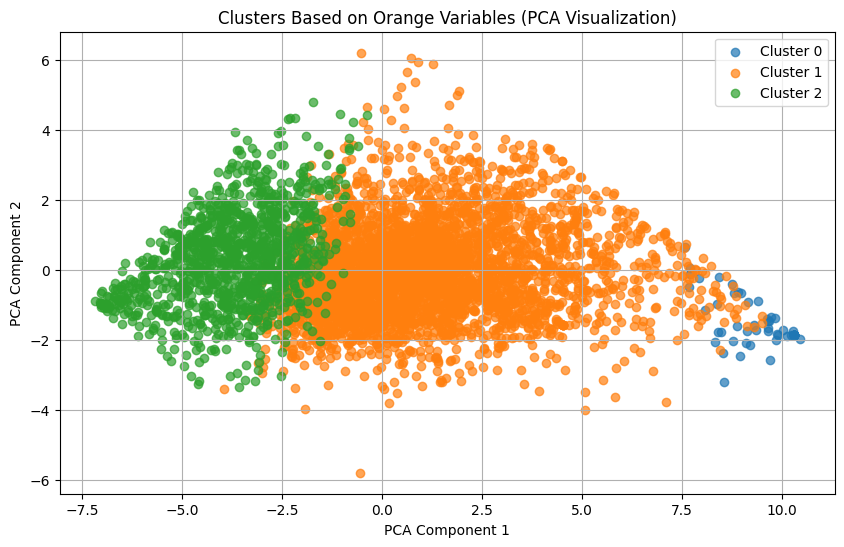

In [46]:
plt.figure(figsize=(10, 6))
for cluster_label in set(data['cluster_orange']):
    cluster_points = orange_data_2d[data['cluster_orange'] == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_label}', alpha=0.7)

plt.title("Clusters Based on Orange Variables (PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid()
plt.show()

## Segmentation based on green variable

In [47]:
# Extract features (Green variables) and target (Orange clusters)
X_green = data[green_vars].fillna(0)
y_orange = data['cluster_orange']

# Split data into training and test sets
X_train_green, X_test_green, y_train, y_test = train_test_split(
    X_green, y_orange, test_size=0.2, random_state=42
)

# Train and Evaluate model
rf_green = RandomForestClassifier(random_state=42)
rf_green.fit(X_train_green, y_train)

y_pred_green = rf_green.predict(X_test_green)
print("Classification Report (Green Variables):\n", classification_report(y_test, y_pred_green))

Classification Report (Green Variables):
               precision    recall  f1-score   support

           0       0.17      0.08      0.11        13
           1       0.88      0.93      0.90       764
           2       0.73      0.61      0.66       223

    accuracy                           0.84      1000
   macro avg       0.59      0.54      0.56      1000
weighted avg       0.83      0.84      0.84      1000



In [48]:
# Extract features (Green variables) and target (Orange clusters)
X2 = data[green_vars].fillna(0)
y2 =  data['cluster_orange']

# Split data into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)

# Train and Evaluate model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train2, y_train2)
y_pred2 = gb.predict(X_test2)
print("Classification Report (Specific Variables with Gradient Boosting):\n", classification_report(y_test2, y_pred2))

Classification Report (Specific Variables with Gradient Boosting):
               precision    recall  f1-score   support

           0       0.40      0.15      0.22        13
           1       0.88      0.92      0.90       764
           2       0.72      0.64      0.68       223

    accuracy                           0.85      1000
   macro avg       0.67      0.57      0.60      1000
weighted avg       0.84      0.85      0.84      1000



## Segmentation based on specific variable

In [49]:
# Extract features (Specific variables) and target (Orange clusters)
X_specific = data[specific_vars].fillna(0)
y_orange = data['cluster_orange']

# Split data into training and test sets
X_train_specific, X_test_specific, y_train, y_test = train_test_split(
    X_specific, y_orange, test_size=0.2, random_state=42
)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Convert weights into a dictionary
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Train and Evaluate model
rf_specific = RandomForestClassifier(random_state=42, class_weight=class_weights_dict)
rf_specific.fit(X_train_specific, y_train)
y_pred_specific = rf_specific.predict(X_test_specific)
print("Classification Report (Specific Variables with Class Weights):\n", classification_report(y_test, y_pred_specific))

Classification Report (Specific Variables with Class Weights):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.77      0.79      0.78       764
           2       0.27      0.26      0.27       223

    accuracy                           0.66      1000
   macro avg       0.35      0.35      0.35      1000
weighted avg       0.65      0.66      0.66      1000



In [50]:
# Extract features (Specific variables) and target (Orange clusters)
X_specific = data[specific_vars].fillna(0)

# Split data into training and test sets
X_train_specific, X_test_specific, y_train, y_test = train_test_split(
    X_specific, y_orange, test_size=0.2, random_state=42
)

# Train and Evaluate model
rf_specific = RandomForestClassifier(random_state=42)
rf_specific.fit(X_train_specific, y_train)
y_pred_specific = rf_specific.predict(X_test_specific)
print("Classification Report (Specific Variables):\n", classification_report(y_test, y_pred_specific))

Classification Report (Specific Variables):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.77      0.87      0.82       764
           2       0.27      0.17      0.21       223

    accuracy                           0.70      1000
   macro avg       0.35      0.35      0.34      1000
weighted avg       0.65      0.70      0.67      1000



## Optimizing results

In [51]:
# Extract features (Specific variables) and target (Orange clusters)
X_specific = data[specific_vars].fillna(0)

# Split data into training and test sets
X_train_specific, X_test_specific, y_train, y_test = train_test_split(
    X_specific, y_orange, test_size=0.2, random_state=42
)

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV to optimize hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring='accuracy', cv=3, verbose=2, n_jobs=-1)

# Fit the GridSearchCV on training data
grid_search.fit(X_train_specific, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# Train and Evaluate model with optimized hyperparameters
rf_optimized = RandomForestClassifier(**best_params, random_state=42)
rf_optimized.fit(X_train_specific, y_train)
y_pred_specific_optimized = rf_optimized.predict(X_test_specific)
print("Classification Report (Specific Variables with Hyperparameter Optimization):\n",
      classification_report(y_test, y_pred_specific_optimized))


Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total tim

/home/alexandre/.local/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.7470
Classification Report (Specific Variables with Hyperparameter Optimization):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.76      1.00      0.87       764
           2       0.50      0.00      0.01       223

    accuracy                           0.76      1000
   macro avg       0.42      0.33      0.29      1000
weighted avg       0.70      0.76      0.66      1000



/home/alexandre/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alexandre/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alexandre/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [52]:
# Define parameter grid for Gradient Boosting
param_grid2 = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize a Gradient Boosting classifier
gb2 = GradientBoostingClassifier(random_state=42)

# Perform GridSearchCV to optimize hyperparameters
grid_search2 = GridSearchCV(estimator=gb2, param_grid=param_grid2, 
                            scoring='accuracy', cv=3, verbose=2, n_jobs=-1)

# Fit the GridSearchCV on training data
grid_search2.fit(X_train2, y_train2)

# Get the best parameters and score
best_params2 = grid_search2.best_params_
best_score2 = grid_search2.best_score_
print(f"Best Hyperparameters (Gradient Boosting): {best_params2}")
print(f"Best Cross-Validation Accuracy (Gradient Boosting): {best_score2:.4f}")

# Train and Evaluate model with optimized hyperparameters
gb_optimized = GradientBoostingClassifier(**best_params2, random_state=42)
gb_optimized.fit(X_train2, y_train2)
y_pred2_optimized = gb_optimized.predict(X_test2)
print("Classification Report (Specific Variables with Gradient Boosting Optimization):\n",
      classification_report(y_test2, y_pred2_optimized))


Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; to

/home/alexandre/.local/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters (Gradient Boosting): {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy (Gradient Boosting): 0.8508
Classification Report (Specific Variables with Gradient Boosting Optimization):
               precision    recall  f1-score   support

           0       0.33      0.08      0.12        13
           1       0.88      0.93      0.90       764
           2       0.73      0.61      0.66       223

    accuracy                           0.85      1000
   macro avg       0.65      0.54      0.56      1000
weighted avg       0.84      0.85      0.84      1000

